# Learning Shapelets

In [11]:
import time
import numpy as np
import tensorflow as tf
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict
from sklearn.metrics import confusion_matrix

%run ../sys_configs.ipynb
%run ../plots.ipynb

Begin by reading in the dataset.

In [2]:
with open('../data/train.npy', 'rb') as f:
    x_train = np.load(f)
    y_train = np.load(f).astype(np.int64)
sz, dim = x_train.shape[1:]
    
with open('../data/val.npy', 'rb') as f:
    x_val = np.load(f)
    y_val = np.load(f).astype(np.int64)
    
with open('../data/test.npy', 'rb') as f:
    x_test = np.load(f)
    y_test = np.load(f).astype(np.int64)
    
classes = np.unique(y_train)  

N_train = len(y_train)
N_val = len(y_val)
N_test = len(y_test)

### Approach

The other class of Shapelet algorithms are those dedicated to learning shapelets via gradient descent [1] rather than extracting them, then applying a logistic regressor. The key idea is to have differentiable transformation and classification function, and using the chain rule of differentiation to compute the gradients w.r.t. the shapelets. Learning shapelets is faster than extracting shapelets, and may lead to shapelets that are actually more discriminative than those that can be found in the dataset. 

### Train

In [3]:
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=len(x_train),
                                                       ts_sz=150,
                                                       n_classes=len(classes),
                                                       l=0.1,
                                                       r=10)

# Define the model using parameters provided by the authors (except that we use fewer iterations here)
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=16,
                            weight_regularizer=.01,
                            max_iter=50,
                            random_state=42,
                            verbose=10)

C:\Users\chris\AppData\Roaming\Python\Python39\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


### Predict

In [4]:
start_time = time.time()
shp_clf.fit(x_train, y_train)
t = time.time() - start_time
print("Finished training. Duration {}".format(t))

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Finished training. Duration 3175.6019933223724


In [5]:
predictions_val = shp_clf.predict(x_val)
predictions_test = shp_clf.predict(x_test)

In [7]:
# Compare predictions against the targets
print("Validation Data - Total predictions made: %s. Number of correct predictions: %s" % (len(predictions_val), sum(np.equal(predictions_val, y_val))))
print("Test Data - Total predictions made: %s. Number of correct predictions: %s" % (len(predictions_test), sum(np.equal(predictions_test, y_test))))

Validation Data - Total predictions made: 1392. Number of correct predictions: 849
Test Data - Total predictions made: 1051. Number of correct predictions: 551


### Visualise predictions for test set

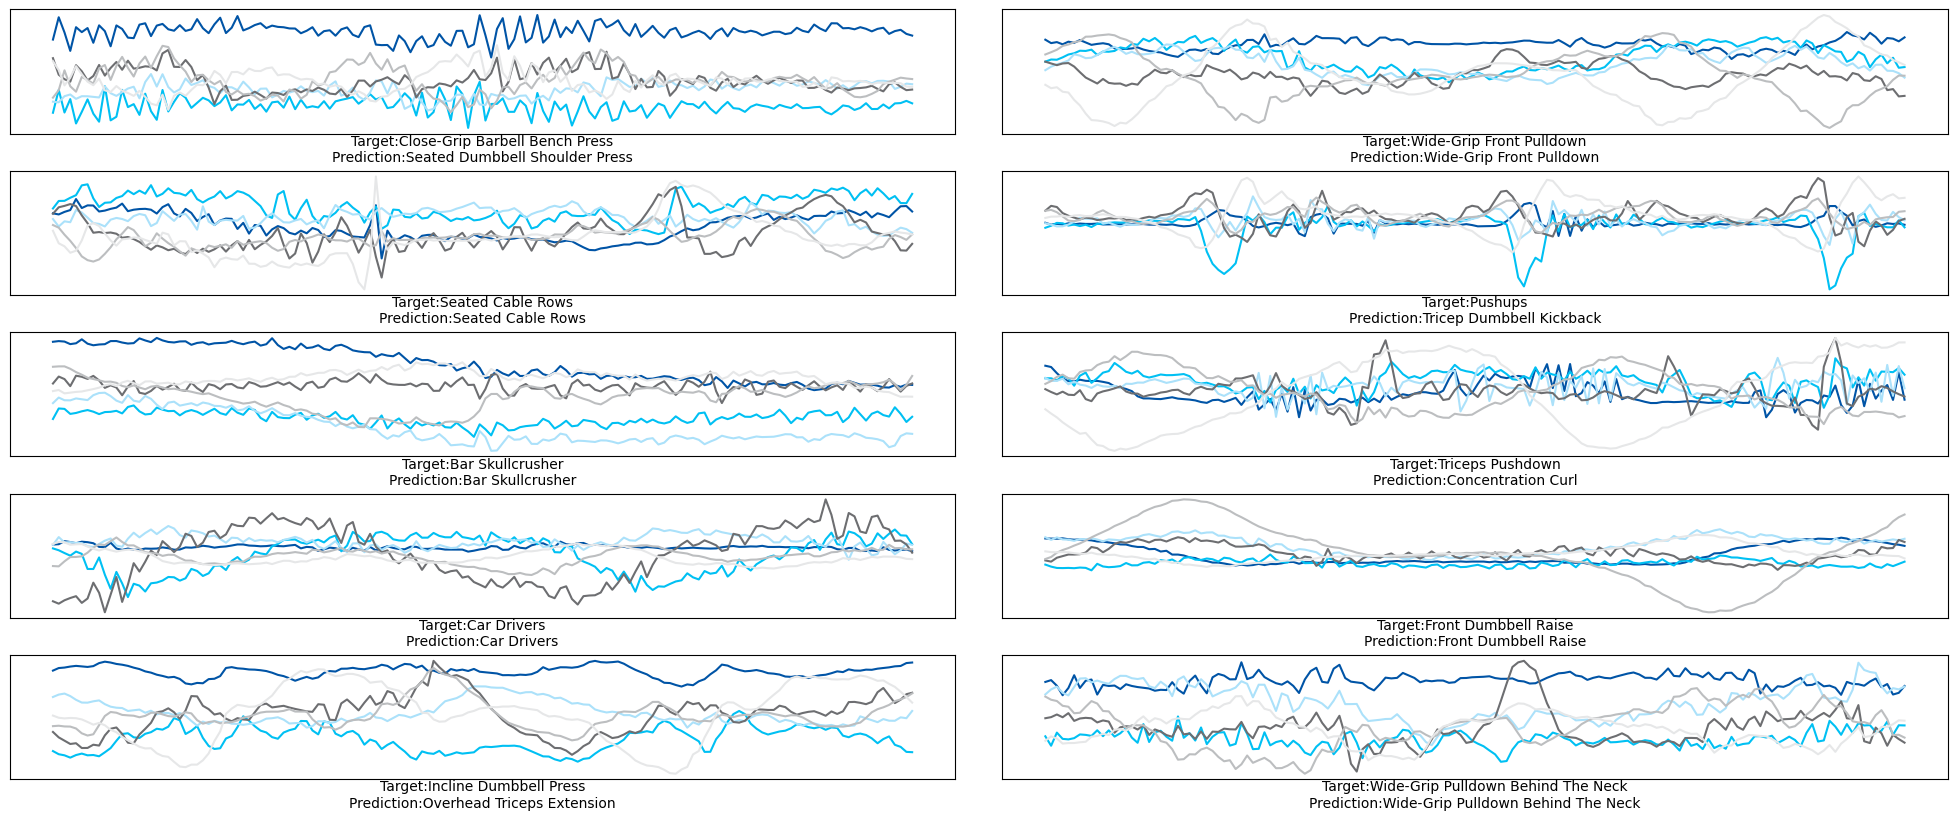

In [6]:
plot_samples(data = x_test, labels = y_test, predictions = predictions_test)

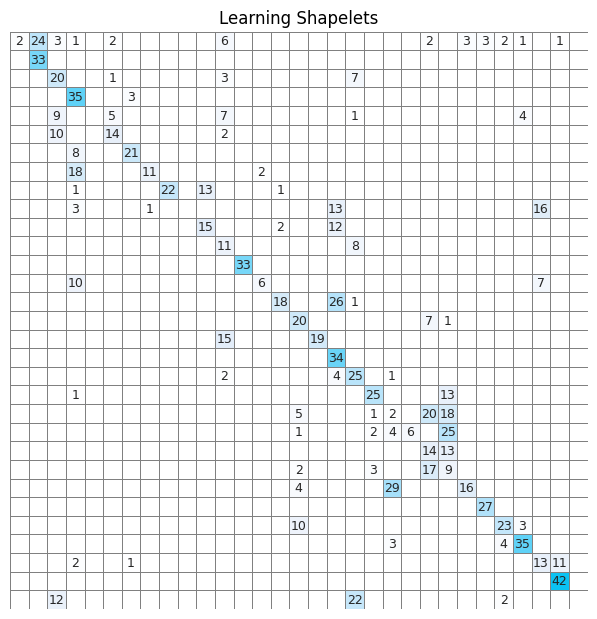

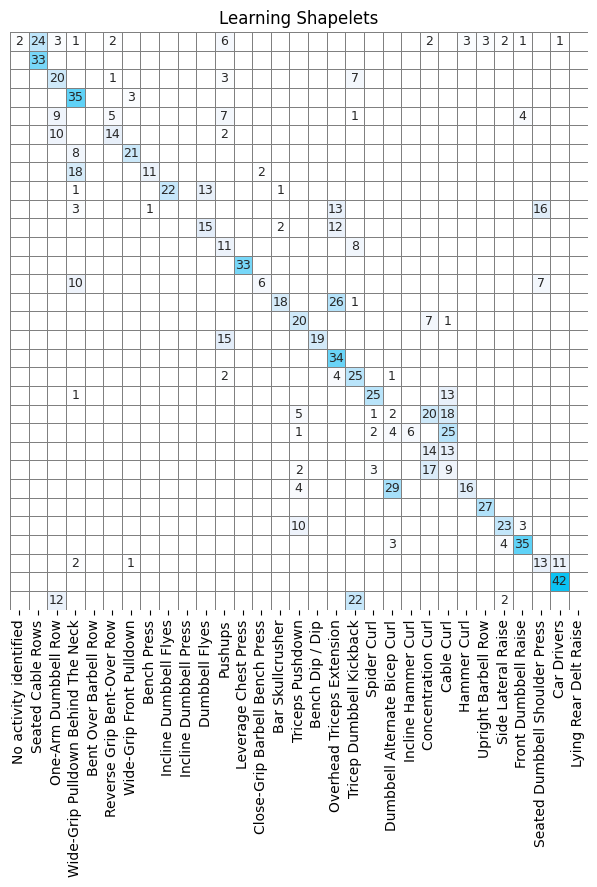

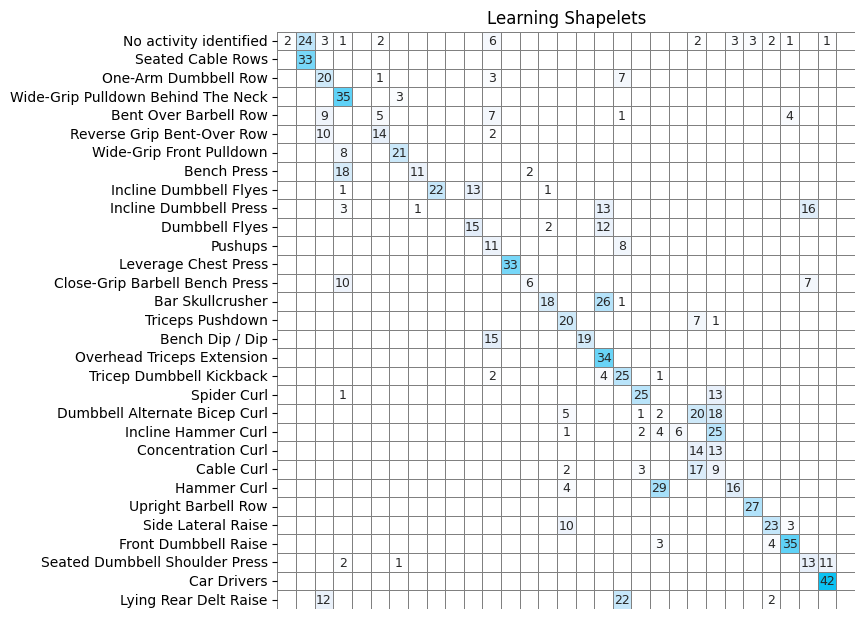

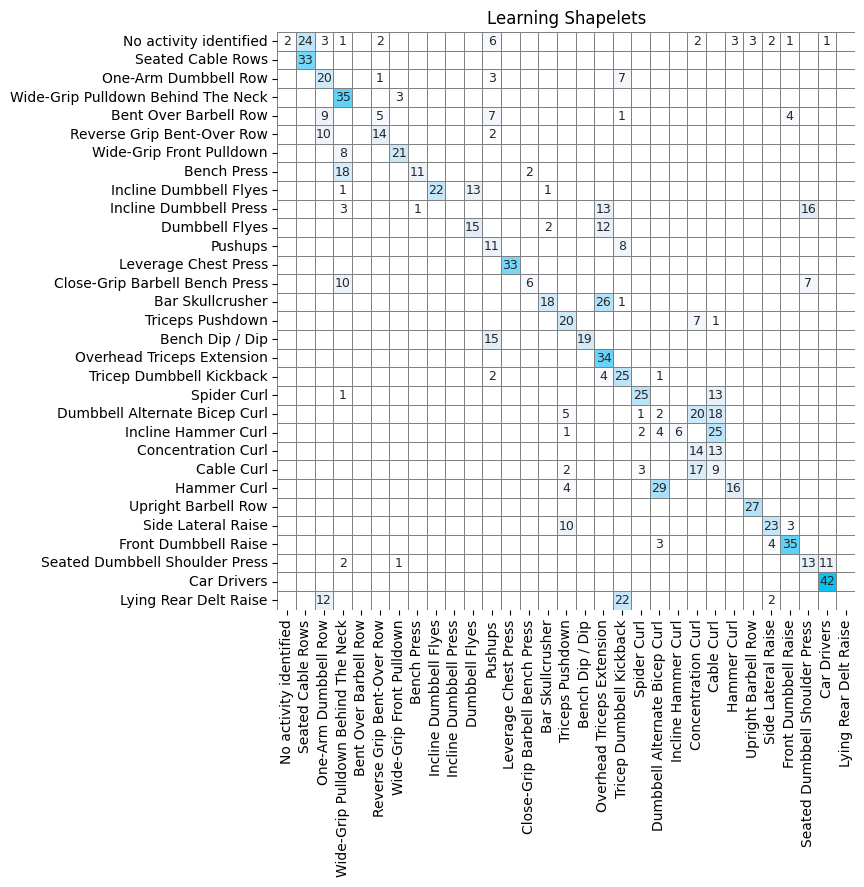

In [12]:
cm = confusion_matrix(y_test, predictions_test, labels = classes)

# Save 4 copies of the confusion matrix, with different permutations of x_ticks and y_ticks turned on
plot_confusion_matrix(cm, x_ticks = False, y_ticks = False, save = True, title = "Learning Shapelets")
plot_confusion_matrix(cm, x_ticks = True, y_ticks = False, save = True, title = "Learning Shapelets")
plot_confusion_matrix(cm, x_ticks = False, y_ticks = True, save = True, title = "Learning Shapelets")
plot_confusion_matrix(cm, x_ticks = True, y_ticks = True, save = True, title = "Learning Shapelets")

## References

[1] Grabocka, Josif, Nicolas Schilling, Martin Wistuba and Lars Schmidt-Thieme. “Learning time-series shapelets.” Proceedings of the 20th ACM SIGKDD international conference on Knowledge discovery and data mining (2014)